In [1]:
from chemicals import CAS_from_any, Tb
import chemicals.critical as ct

In [2]:
sub = CAS_from_any("HCN")

In [3]:
Tb(sub, method="CRC_ORG")

298.78

In [4]:
ct.Tb_Tc_relationship(Tc=ct.Tc(sub))

278.6585365853659

In [5]:
import chemicals.data_reader as cd
cd.CONSTANT_DATABASE_NAME_TO_IDX

{'index': 0,
 'MW': 1,
 'Tt': 2,
 'Tm': 3,
 'Tb': 4,
 'Tc': 5,
 'Pt': 6,
 'Pc': 7,
 'Vc': 8,
 'Zc': 9,
 'omega': 10,
 'T_flash': 11,
 'T_autoignition': 12,
 'LFL': 13,
 'UFL': 14,
 'Hfs': 15,
 'Hfl': 16,
 'Hfg': 17,
 'S0s': 18,
 'S0l': 19,
 'S0g': 20,
 'Hfus': 21,
 'Stockmayer': 22,
 'molecular_diameter': 23,
 'dipole_moment': 24,
 'logP': 25,
 'RG': 26,
 'RON': 27,
 'MON': 28,
 'ignition_delay': 29,
 'linear': 30,
 'GWP': 31,
 'ODP': 32,
 'RI': 33,
 'RIT': 34}

In [15]:
chemicals.phase_change.Tb_all_methods

('HEOS',
 'CRC_INORG',
 'CRC_ORG',
 'COMMON_CHEMISTRY',
 'WEBBOOK',
 'YAWS',
 'WIKIDATA',
 'JOBACK')

In [6]:
from chemicals import miscdata
import chemicals.phase_change
CRC_ORG = 'CRC_ORG'
CRC_INORG = 'CRC_INORG'
YAWS = 'YAWS'
OPEN_NTBKM = 'OPEN_NTBKM'
CRC = 'CRC'

Tb_sources = {
        miscdata.HEOS: miscdata.heos_data,
        CRC_ORG: miscdata.CRC_organic_data,
        CRC_INORG: miscdata.CRC_inorganic_data
    }
cd.retrieve_from_df_dict(Tb_sources, sub, 'Tb', method=CRC_ORG)

298.78

In [7]:
df=Tb_sources[CRC_ORG]
#df.columns
df2=df[['Name', 'Tb']]
df3 = df2.dropna()
#["Tb"]]
df3

,Name,Tb
CAS,,
50-00-0,Formaldehyde,254.05
50-29-3,"1,1,1-Trichloro-2,2-bis(4-chlorophenyl)ethane",533.15
50-79-3,"2,5-Dichlorobenzoic acid",574.15
51-21-8,5-Fluorouracil,642.15
51-64-9,"1-Phenyl-2-propylamine, (S)-",476.65
...,...,...
114489-96-2,Isobutyl 2-chloropropanoate,449.15
116724-11-9,"sec-Butyl isothiocyanate, (±)-",432.65
116783-23-4,sec-Butyl methyl ether,332.25


In [8]:
df3["Name"]

CAS
50-00-0                                         Formaldehyde
50-29-3        1,1,1-Trichloro-2,2-bis(4-chlorophenyl)ethane
50-79-3                             2,5-Dichlorobenzoic acid
51-21-8                                       5-Fluorouracil
51-64-9                         1-Phenyl-2-propylamine, (S)-
                                   ...                      
114489-96-2                      Isobutyl 2-chloropropanoate
116724-11-9                   sec-Butyl isothiocyanate, (±)-
116783-23-4                           sec-Butyl methyl ether
116836-32-9                             sec-Butyl pentanoate
156053-88-2        Perfluoroethyl 2,2,2-trifluoroethyl ether
Name: Name, Length: 4986, dtype: object

In [9]:
import numpy as np
import pandas as pd
import pubchempy as pcp

In [10]:
from chemicals.data_reader import (
    data_source,
    database_constant_lookup,
    list_available_methods_from_df_dict,
    register_df_source,
    retrieve_any_from_df_dict,
    retrieve_from_df_dict,
)
Tb_data_Yaws = data_source('Yaws Boiling Points.tsv')

Tb_sources_new = {
        miscdata.HEOS: miscdata.heos_data,
        CRC_ORG: miscdata.CRC_organic_data,
        CRC_INORG: miscdata.CRC_inorganic_data,
        miscdata.COMMON_CHEMISTRY: miscdata.common_chemistry_data,
        miscdata.WEBBOOK: miscdata.webbook_data,
        YAWS: Tb_data_Yaws,
        miscdata.WIKIDATA: miscdata.wikidata_data,
        miscdata.JOBACK: miscdata.joback_predictions,
    }

In [11]:
df_new=Tb_sources_new
cas_arr = []
df1 = []
for dict_df in df_new:
    print(dict_df, "  ", len(Tb_sources_new[dict_df]["Tb"].dropna()))
    df2 = Tb_sources_new[dict_df].index.to_numpy()
    df2 = list(set(df1) | set(df2))
    df1 = Tb_sources_new[dict_df].index.to_numpy()

HEOS    140
CRC_ORG    4986
CRC_INORG    556
COMMON_CHEMISTRY    10419
WEBBOOK    5847
YAWS    13461
WIKIDATA    872
JOBACK    23068


In [12]:
df_new=Tb_sources_new
cas_arr = []
list1 = list()
for dict_df in df_new:
    table = Tb_sources_new[dict_df]
    table["CAS"]=table.index
    #TABLE = table["Tb"].dropna()
    #print(table)
    #temp_DF = pd.concat([df1,table])
    list1.append(table)
list1

[                   ID       Tc       Pc        Vc       Tt            Pt  \
 CAS                                                                        
 60-29-7           DEE  466.700  3720200  0.000281  156.920           NaN   
 64-17-5       ethanol  514.710  6268000  0.000169  159.000      0.000718   
 67-56-1      methanol  513.380  8215850  0.000114  175.610      0.186350   
 67-64-1       acetone  508.100  4692400  0.000213  178.500      2.326483   
 71-43-2       benzene  562.020  4907277  0.000256  278.674   4784.605132   
 ...               ...      ...      ...       ...      ...           ...   
 22410-44-2   RE245cb2  406.813  2886400  0.000300  250.000  27667.965555   
 29118-24-9   R1234ZEE  382.513  3634900  0.000233  169.000    228.565553   
 29118-25-0   R1234ZEZ  423.270  3530600  0.000250  238.000  11942.009433   
 102687-65-0  R1233ZDE  439.600  3623700  0.000272  195.150    273.307507   
 111512-60-8  R1224YDZ  428.690  3337000  0.000282  263.000  35163.615401   

In [13]:
table["CAS"]=table.index
table

,Tm,Hfus,Hvap,Tb,Tc,Pc,Vc,Hfg,Cpg0,Cpg1,Cpg2,Cpg3,mul0,mul1,CAS
CAS,,,,,,,,,,,,,,,
50011,349.88,NaN,55715,490.01,NaN,NaN,NaN,130390,26.760,0.23518,-0.000054,-3.160000e-08,NaN,NaN,50011
50022,785.74,32376.0,120697,1134.35,1389.66260,1973554.0,0.001104,-1056400,-324.279,3.45706,-0.003483,1.473960e-06,NaN,NaN,50022
50033,757.51,36172.0,115636,1129.27,1382.58070,1683793.9,0.001166,-1098660,-274.889,3.24206,-0.002932,1.139360e-06,NaN,NaN,50033
50044,769.15,30523.0,103513,1109.58,1364.98590,1651112.9,0.001154,-1063790,-249.689,3.06626,-0.002713,1.044760e-06,NaN,NaN,50044
50077,911.09,49318.0,99111,1010.57,1262.22420,2811361.0,0.000844,-528790,-45.969,1.75404,-0.001357,4.599000e-07,NaN,NaN,50077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500116881,258.08,17300.0,38953,485.90,652.93694,2407640.5,0.000504,-1519010,25.761,0.78210,-0.000622,1.737000e-07,NaN,NaN,500116881
727411247,389.00,20007.0,59616,572.73,812.94311,4414962.3,0.000409,-141050,-35.020,0.80420,-0.000438,7.066000e-08,NaN,NaN,727411247
850411211,379.12,30055.0,59811,608.81,799.45191,2550760.1,0.000584,-901920,23.034,0.86074,-0.000447,6.630000e-08,2354.36,-17.793,850411211


In [14]:
# create a excel writer object
text_sheet = "Source_"
i=1
with pd.ExcelWriter("TB_DB_CHEMICAL.xlsx") as writer:
    for list in list1 :
        temp_text_sheet = text_sheet+str(i)
        #print(list)
        #print("")
        #print("")
        
        # use to_excel function and specify the sheet_name and index 
        # to store the dataframe in specified sheet
        list.to_excel(writer, sheet_name=temp_text_sheet, index=False)
        i=i+1

In [13]:
chemicals.phase_change.Tb_all_methods
len(df2)

31495

In [ ]:
List1=list()
List2=list()
names = df3["Name"]
i=0
for name1 in names:
    print(i, "  ",name1)
    results = pcp.get_compounds(name1, 'name')
    if results == []:
        List1.append('None')
        List2.append('None')
    else:
        print(results[0].isomeric_smiles, " ", results[0].molecular_formula)
        List1.append(results[0].isomeric_smiles)
        List2.append(results[0].molecular_formula )
    i=i+1
    print("")
    
data = {
    "Name":names,
    "SMILES":List1,
    "Formula":List2
    }

tdf = pd.DataFrame(data)

tdf.to_csv("SMILES_3.csv")

0    Formaldehyde
C=O   CH2O

1    1,1,1-Trichloro-2,2-bis(4-chlorophenyl)ethane
C1=CC(=CC=C1C(C2=CC=C(C=C2)Cl)C(Cl)(Cl)Cl)Cl   C14H9Cl5

2    2,5-Dichlorobenzoic acid
C1=CC(=C(C=C1Cl)C(=O)O)Cl   C7H4Cl2O2

3    5-Fluorouracil
C1=C(C(=O)NC(=O)N1)F   C4H3FN2O2

4    1-Phenyl-2-propylamine, (S)-

5    Ethyl carbamate
CCOC(=O)N   C3H7NO2

6    N,N,N',N'-Tetramethylmethanediamine
CN(C)CN(C)C   C5H14N2

7    Spironolactone
CC(=O)S[C@@H]1CC2=CC(=O)CC[C@@]2([C@@H]3[C@@H]1[C@@H]4CC[C@]5([C@]4(CC3)C)CCC(=O)O5)C   C24H32O4S

8    L-Nicotine
CN1CCC[C@H]1C2=CN=CC=C2   C10H14N2

9    N-Nitrosodiethylamine
CCN(CC)N=O   C4H10N2O

10    Benzamide
C1=CC=C(C=C1)C(=O)N   C7H7NO

11    Tetrachloromethane
C(Cl)(Cl)(Cl)Cl   CCl4

12    1,1,3,3-Tetramethyl-1,3-diphenyldisiloxane
C[Si](C)(C1=CC=CC=C1)O[Si](C)(C)C2=CC=CC=C2   C16H22OSi2

13    Parathion
CCOP(=S)(OCC)OC1=CC=C(C=C1)[N+](=O)[O-]   C10H14NO5PS

14    Benz[a]anthracene
C1=CC=C2C(=C1)C=CC3=CC4=CC=CC=C4C=C32   C18H12

15    Glycerol
C(C(CO)O)O   C3H8

In [35]:
import numpy as np
import pandas as pd
import pubchempy as pcp


def remove_outliers(Excel_path, Excel_sheetname, Threshold=3):
    df = pd.read_excel(Excel_path, sheet_name=Excel_sheetname)
    data = df['Tb']
    outliers=[]
    threshold=Threshold
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    new_df = df[~df['Tb'].isin(outliner)]
    print(outliers)
    return new_df
df = remove_outliers("Data.xlsx", "Load_AllDataSetC12", 3)

[111.65, 184.55, 231.05, 169.45, 225.55, 188.45, 223.34999999999997, 1025.15, 753.8, 673.15, 674.15, 691.15]


In [36]:
df

,Name,SMILES,Tb,C
3,Cyclopropane,C1CC1,240.35,3
4,2-Methylpropane,CC(C)C,261.45,4
5,n-butane,CCCC,272.65,4
6,"1,3-Butadiene",C=CC=C,268.75,4
7,Spiro[2.2]pentane,C1CC12CC2,312.15,5
...,...,...,...,...
3364,"2-Propanamine, 2-Methyl-n-(1-Methylethyl)-",CC(C)NC(C)(C)C,371.15,7
3365,"Pyridazine, 4-Methyl-",CC1=CN=NC=C1,372.15,5
3366,Nitroethene,C=C[N+](=O)[O-],371.65,2
3367,"Hydrazine, 1,1-Diethyl-",CCN(CC)N,372.15,4


<Axes: xlabel='Tb'>

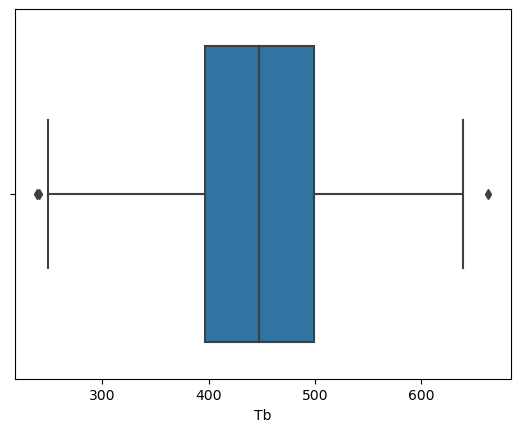

In [37]:
import seaborn as sns
sns.boxplot(x=df['Tb'])

In [38]:
df2 = remove_outliers("Data.xlsx", "From_8DB_Chemicals", 3)

[2163.15, 3273.15, 4173.15, 4063.15, 3873.15, 1698.15, 1600.15, 1899.15, 1661.15, 3893.15, 4033.15, 4673.15, 4573.15, 3273.15, 1973.15, 4343.15, 2023.15, 1640.15, 3273.15, 1848.15, 3250.15, 4003.15, 2792.15, 2840.15, 4701.15, 3134.15, 3737.15, 2022.15, 1615.15, 3675.15, 2334.15, 4912.15, 4175.15, 3347.15, 3186.15, 5014.15, 5281.15, 3236.15, 4098.15, 3501.15, 3793.15, 3273.15, 5863.15, 3968.15, 4420.15, 2067.15, 3109.15, 3538.15, 2435.15, 1650.15, 5728.15, 4535.15, 3503.15, 1746.15, 5058.15, 2223.15, 2859.15, 3560.15, 5828.15, 3473.15, 2284.15, 1860.15, 2118.15, 2741.15, 4273.15, 3716.15, 2944.15, 3200.15, 2833.15, 3141.15, 1802.15, 3546.15, 2502.15, 3106.15, 3109.15, 4873.15, 2973.15, 4404.15, 3680.15, 3618.15, 4679.15, 1837.15, 1757.15, 2300.15, 1518.15, 1656.15, 1573.15, 1738.15, 1663.15, 1570.15, 1596.15, 1977.15, 1563.15, 1577.15, 1708.15, 2453.15, 1763.15, 1707.15, 2500.15, 1566.15, 2733.15, 1773.15, 1820.15, 1779.15, 1775.15, 1685.15, 2533.15, 2003.15, 1556.15, 1573.15, 1618.15, 

In [39]:
df2

,CAS,Name,Tb,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,60-29-7,DEE,307.604402,NaN,NaN,NaN,NaN,ne,NaN
1,64-17-5,ethanol,351.570442,NaN,NaN,NaN,ethanol,NaN,"ethanol,methanol,acetone,benzene,methane,ethan..."
2,67-56-1,methanol,337.632383,NaN,NaN,NaN,methanol,NaN,NaN
3,67-64-1,acetone,329.224923,NaN,NaN,NaN,acetone,NaN,"ethanol,methanol,acetone,benzene,methane,ethan..."
4,71-43-2,benzene,353.218780,NaN,NaN,NaN,benzene,NaN,NaN
...,...,...,...,...,...,...,...,...,...
44332,500116881,NaN,485.900000,NaN,NaN,NaN,NaN,NaN,NaN
44333,727411247,NaN,572.730000,NaN,NaN,NaN,NaN,NaN,NaN
44334,850411211,NaN,608.810000,NaN,NaN,NaN,NaN,NaN,NaN
44335,1235106667,NaN,907.670000,NaN,NaN,NaN,NaN,NaN,NaN
